# Part 1. Import required packages

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import seaborn as sns
import pandas_datareader.data as web
%matplotlib inline

# Part 2. Plot VIX futures market data for futures expiring 1 month to 1 year (1 plot for each weekly data gathered)

[0, 15, 30, 45, 60, 75, 90, 105, 120, 134, 148, 163, 178, 193, 208, 223, 238, 253, 268, 283]
20
[0, 75, 148, 223] [75, 148, 223, 298]
    Symbol Expiration   Last  Change   High    Low Settlement Volume
1  VX28N20  7/15/2020  28.45    0.18  28.45  27.85     28.275      7
2    VXN20  7/22/2020  28.88    0.11  29.05  28.20     28.775  25810
3  VX30N20  7/29/2020  29.90    0.00  29.90  29.90       29.9     10
4  VX31Q20   8/5/2020  30.00    0.00   0.00   0.00         30      0
5  VX32Q20  8/12/2020  31.35    0.00   0.00   0.00     30.075      0
   Symbol  Expiration   Last  Change   High    Low Settlement Volume
70  VXX20  11/18/2020  30.60   -0.38  31.00  30.50     30.975   1245
71  VXZ20  12/16/2020  29.06   -0.19  29.30  28.86      29.25    834
72  VXF21   1/20/2021  29.18   -0.20  29.33  29.01     29.375    324
73  VXG21   2/17/2021  28.77   -0.08  28.85  28.60      28.85     22
74  VXH21   3/17/2021  30.75    0.00   0.00   0.00      26.65      0


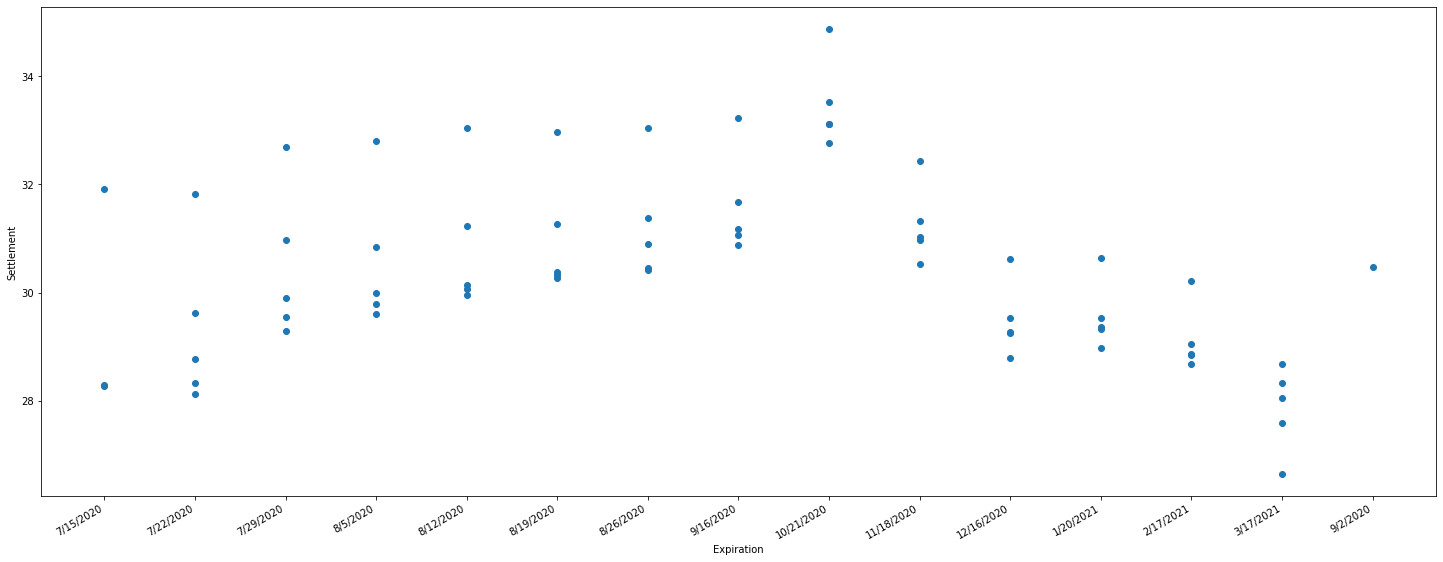

     Symbol Expiration   Last  Change  High    Low Settlement Volume
76    VXN20  7/22/2020  24.85   -1.58  27.1  24.74     26.425  21295
77  VX30N20  7/29/2020  28.60    0.00   0.0   0.00     27.775      0
78  VX31Q20   8/5/2020  31.00    0.00   0.0   0.00     28.175      0
79  VX32Q20  8/12/2020  30.05    0.00   0.0   0.00      28.65      0
80    VXQ20  8/19/2020  27.73   -1.25  29.6  27.65     28.975  26780
    Symbol  Expiration  Last  Change   High    Low Settlement Volume
143  VXX20  11/18/2020  30.3    0.33  30.56  29.69     29.975   1460
144  VXZ20  12/16/2020  28.7    0.25  28.97  28.20      28.45    757
145  VXF21   1/20/2021  29.0    0.28  29.27  28.60     28.725    748
146  VXG21   2/17/2021  28.5    0.10  28.91  28.30       28.4    243
147  VXH21   3/17/2021  28.2    0.13  28.50  28.05     28.075     30


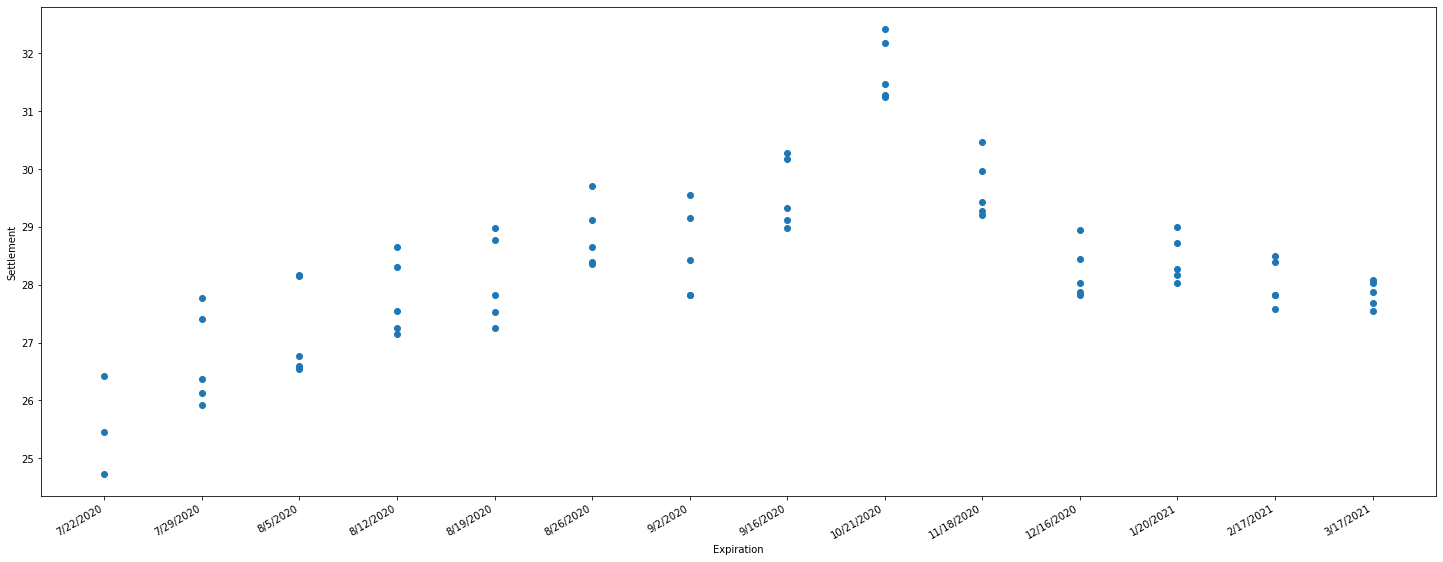

      Symbol Expiration   Last  Change  High    Low Settlement Volume
149  VX30N20  7/29/2020  25.65   -1.40  26.5  25.65      27.05     18
150  VX31Q20   8/5/2020  26.65   -1.20  28.4  26.65      27.85      4
151  VX32Q20  8/12/2020  27.30   -0.90  27.3  27.30       28.2      1
152    VXQ20  8/19/2020  28.00   -0.73  29.0  27.85     28.725  15514
153  VX34Q20  8/26/2020  28.65    0.00   0.0   0.00      29.55      0
    Symbol  Expiration   Last  Change   High    Low Settlement Volume
218  VXZ20  12/16/2020  28.75    0.18  29.05  28.32    28.5750   1079
219  VXF21  01/20/2021  29.15    0.08  29.45  28.70    29.0750    419
220  VXG21  02/17/2021  28.70    0.05  29.05  28.40    28.6500    204
221  VXH21  03/17/2021  28.60    0.05  28.75  28.33    28.5500     37
222  VXJ21  04/21/2021   0.00    0.00   0.00   0.00    28.8250      0


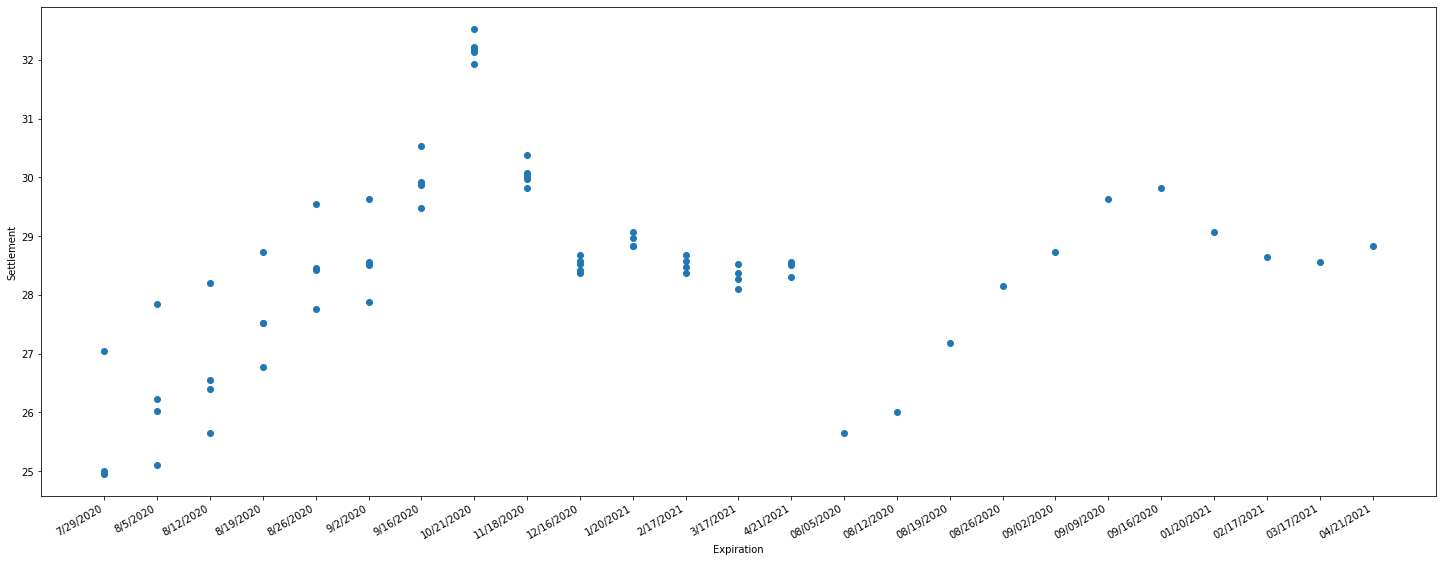

      Symbol  Expiration   Last  Change  High    Low Settlement Volume
224  VX31Q20  08/05/2020  25.05   -0.70  25.3  25.05    25.7500      5
225  VX32Q20  08/12/2020  26.80    0.00   0.0   0.00    26.0750      0
226    VXQ20  08/19/2020  26.83    0.01  27.3  26.44    26.8250  19762
227  VX34Q20  08/26/2020  29.80    0.00   0.0   0.00    27.8250      0
228  VX35U20  09/02/2020   0.00    0.00   0.0   0.00    28.4500      0
    Symbol  Expiration   Last  Change   High    Low Settlement Volume
293  VXZ20  12/16/2020  27.90    0.03  28.33  27.80    27.8750    505
294  VXF21  01/20/2021  28.35    0.08  28.70  28.27    28.2750    220
295  VXG21  02/17/2021  27.95    0.08  28.30  27.92    27.8750    157
296  VXH21  03/17/2021  27.75    0.10  28.03  27.75    27.6500     46
297  VXJ21  04/21/2021  27.49    0.00   0.00   0.00    27.5000      0


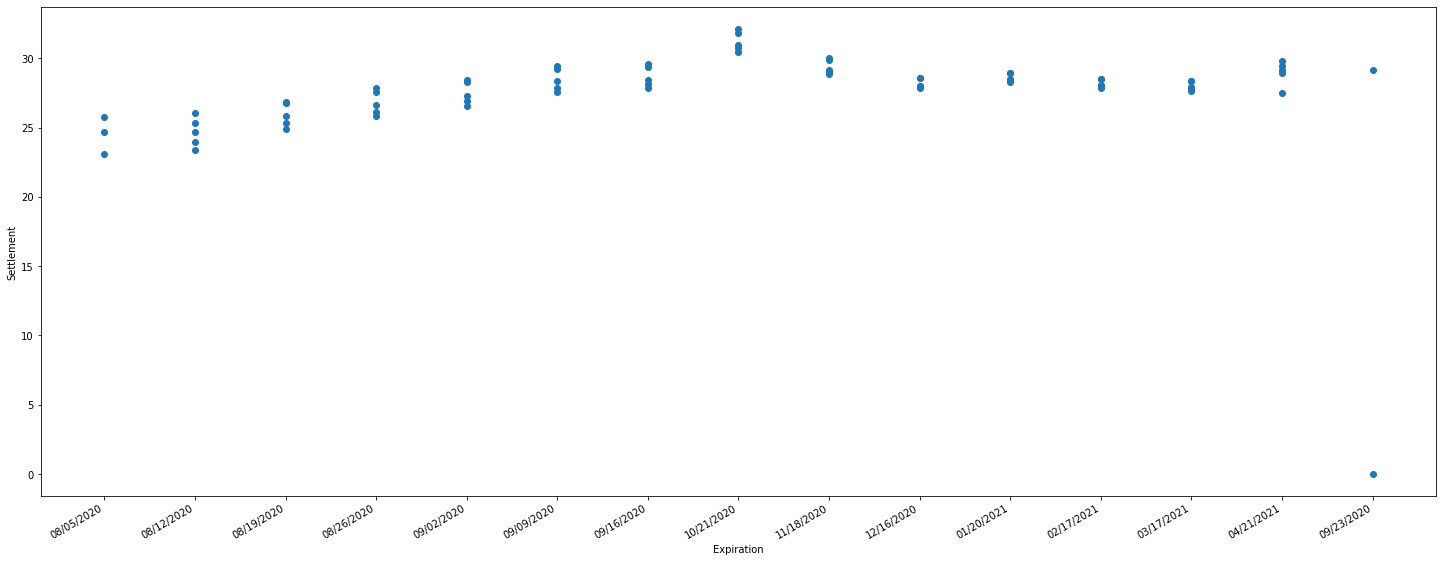

In [73]:
def vol_term():
# Data from: https://www.cboe.com/tradable_products/vix/vix_futures/    
# Get vix_settlement data from CBOE VIX futures csv file
    vix_settlement = pd.read_csv("../output/CBOE VIX futures.csv")
    index_vix = vix_settlement.loc[vix_settlement['Settlement']=='-'].index.tolist()
    n = len(index_vix)

# Find list of week beginning and week end dates 
    week_beginning = []
    week_end = []
    
    for i in range(0, int(n//5)):
            week_beginning.append(index_vix[i*5])
    if n%5 ==0:
        for i in range(0, int(n//5-1)):
            week_end.append(index_vix[(i+1)*5])
    else:        
        for i in range(0, int(n//5)):
            week_end.append(index_vix[(i+1)*5]) 
        week_beginning.append(index_vix[int(n//5)*5])
    week_end.append(len(vix_settlement['Settlement'])) 

# Set up data frames of VIX prices by separating blocks of data between “^VIX” rows
    for j in range(len(week_beginning)):
        df = vix_settlement.iloc[week_beginning[j]+1:week_end[j]]
        df = df.drop(index=df[df['Settlement']=='-'].index)
        df = df.drop(index=df[df['Settlement']=='0'].index) 
        df['Settlement'] = [float(x) for x in df['Settlement']]

# Plot Vol term structure: Settlement prices vs Expiration Date for each block of data between “^VIX” rows
        fig, ax = plt.subplots(figsize = (25,10))
        ax.scatter(df['Expiration'],df['Settlement'],label=' Settlement vs.Expiration')
        ax.set_xlabel("Expiration")
        ax.set_ylabel("Settlement")

# Rotate date labels automatically
        fig.autofmt_xdate()
        plt.show()
        ax.set_title("Settlement vs.Expiration")
        ax.legend()
        
vol_term()

# Part 3. Plot VIX vs Expiration Date for each “Trade Date”, 1 plot per week (4 weeks of data gathered altogether)

### a. Load VIX term structure data from CBOE VIX csv file and process data

In [ ]:
vix = pd.read_csv("../output/CBOE VIX.csv")
#Data from: https://www.cboe.com/tradable_products/vix/term_structure/#3

#Processing data format
vix = vix.loc[1:]
vix['VIX'] = [float(x) for x in vix['VIX']]

vix['Trade Date'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p') if x[-2:]=='AM' or x[-2:]=='PM'
                     else datetime.strptime(x, '%m/%d/%Y %H:%M') for x in vix['Trade Date']]
vix['Index'] = [datetime.strftime(x,'%Y-%m-%d') for x in vix['Trade Date']]

#Set beginning and end of week dates

week_beginning = []
week_end = []
weeks = int(((max(vix['Trade Date'])- vix.loc[1]['Trade Date']).days+1)//7)
print((max(vix['Trade Date'])- vix.loc[1]['Trade Date']).days)
print('Number of complete weeks past:', weeks)

for i in range(1, weeks+1):
    week_beginning.append(vix.loc[1]['Trade Date']+timedelta(days = (i-1)*7))
    week_end.append(week_beginning[i-1]+timedelta(days = 4)) 
        
week_beginning.append(vix.loc[1]['Trade Date']+timedelta(days = (weeks)*7))
week_end.append(week_beginning[-1]+timedelta(days = 4)) 
week_beginning = [datetime.strftime(x,'%Y-%m-%d') for x in week_beginning]
week_end = [datetime.strftime(x,'%Y-%m-%d') for x in week_end]

### b. Draw weekly plots

27
Number of complete weeks past: 4
['2020-07-13', '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10']
['2020-07-17', '2020-07-24', '2020-07-31', '2020-08-07', '2020-08-14']


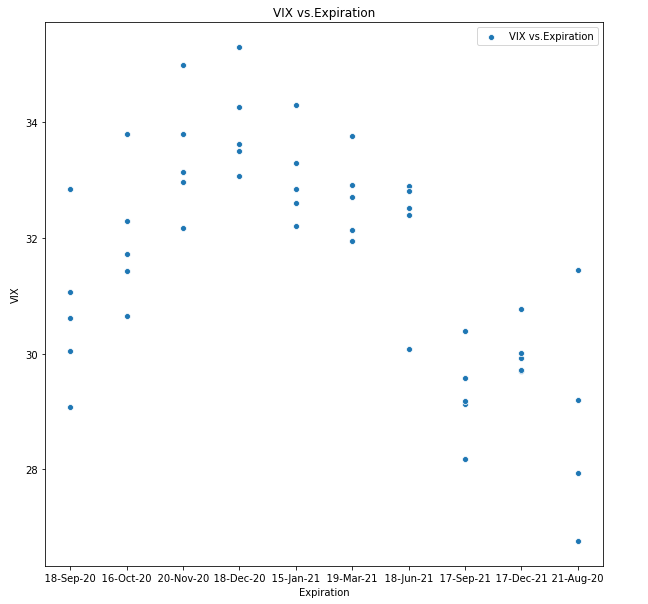

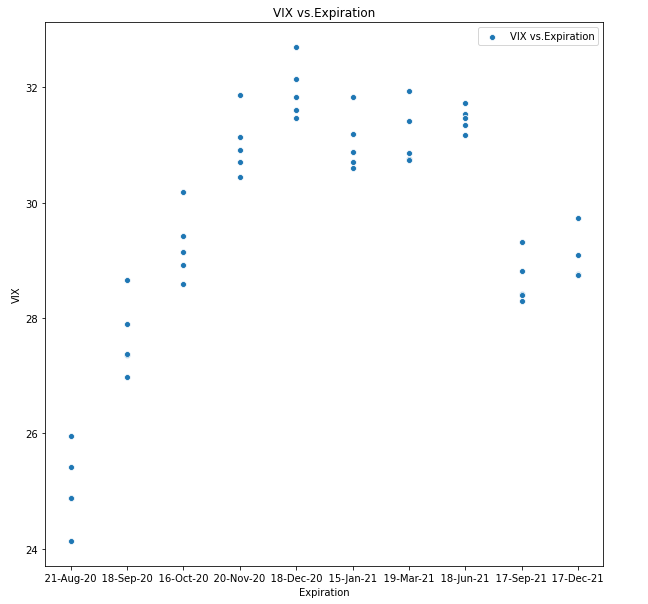

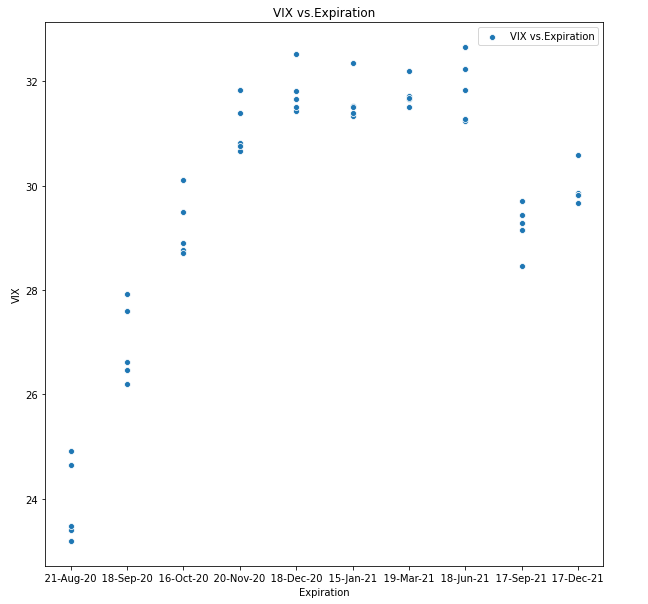

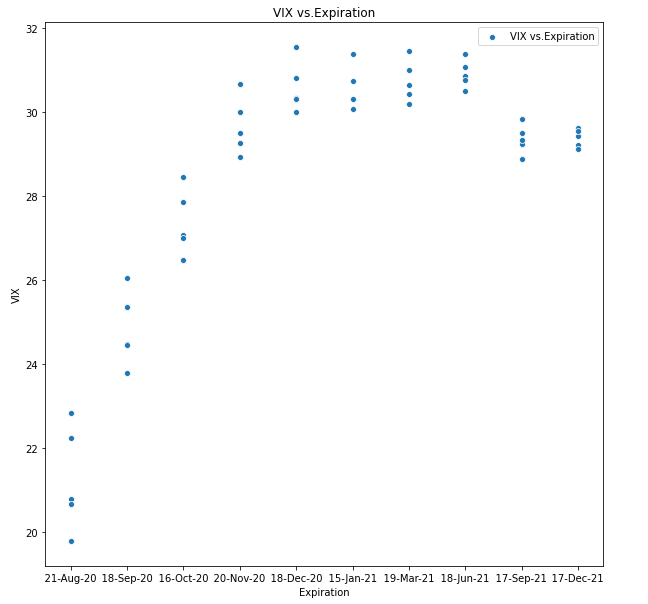

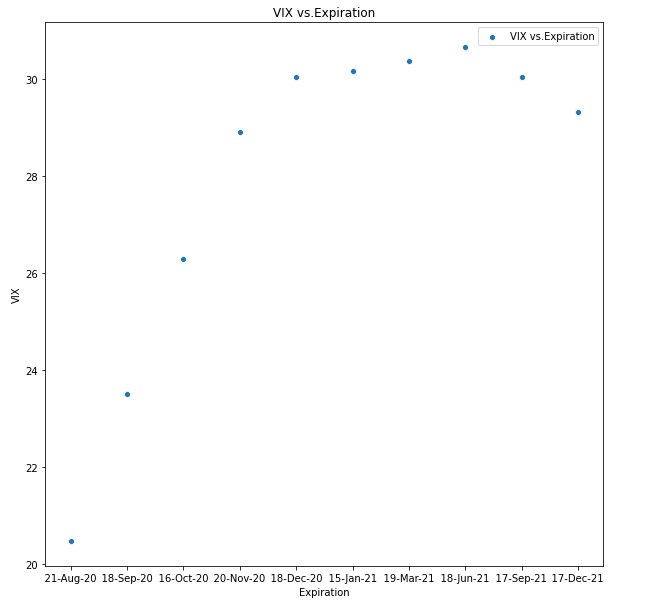

In [85]:
for j in range(len(week_beginning)-1):
    df = vix.loc[vix[vix['Index']== week_beginning[j]].index.tolist()[0]:vix[vix['Index']== week_end[j]].index.tolist()[-1]]
    figure = plt.figure(figsize = (10,10))
    sns.scatterplot(df['Expiration Date'],df['VIX'],label='VIX vs.Expiration')
    plt.xlabel("Expiration")
    plt.ylabel("VIX")
    plt.title("VIX vs.Expiration")
    plt.legend()

df2 = vix.loc[vix[vix['Index']== week_beginning[weeks]].index.tolist()[0]:]
figure = plt.figure(figsize = (10,10))
sns.scatterplot(df2['Expiration Date'],df2['VIX'],label='VIX vs.Expiration')
plt.xlabel("Expiration")
plt.ylabel("VIX")
plt.title("VIX vs.Expiration")
plt.legend()

# Part 4. Examine Vol Clustering

### a. Define Vol_clustering function to calculate correlations of returns using 5 years data and plot them against different time lags

In [ ]:
def vol_clustering(ticker, dlist):
    
#Set enddate = today and start date = same day 5 years ago
    enddate2 = date.today().strftime("%Y-%m-%d")
    startdate2 = (datetime.strptime(enddate2,"%Y-%m-%d")-timedelta(days = 5*365)).strftime("%Y-%m-%d")
    
    corn = []    #List of Correlation of returns over different time lags
    cora= []     #List of Correlation of absolute returns over different time lags
    corr_std_r1r2 = []      #List Correlation of std of abs returns over different time lags
    
# Set start and end dates for different time lags (d days) relative to the start and end dates above 
    for d in dlist: 
        startdate1 = datetime.strptime(startdate2,"%Y-%m-%d")-timedelta(days = d)
        enddate1 = datetime.strptime(enddate2,"%Y-%m-%d")-timedelta(days = d)
    
# Pull data for the ticker during that time period
        df1 = web.DataReader(ticker, data_source = 'yahoo', start = startdate1, end = enddate1)
        df1 = df1.reset_index()
        
#Compute daily returns and daily absolute returns 
        r1 = np.log(df1['Close'])- np.log(df1['Close'].shift(1))
        abs_r1 = abs(r1)

#Compute returns d days later
        df2 = web.DataReader(ticker, data_source = 'yahoo', start = startdate2, end = enddate2)
        df2 = df2.reset_index()
        r2 = np.log(df2['Close'])- np.log(df2['Close'].shift(1))
        abs_r2 = abs(r2)
        
#Comput std over d days    
        abs_std1 = abs_r1.rolling(d).std() #Moving average Std over d days
        abs_std2 = abs_r2.rolling(d).std()

#Compute corr using pandas function
        corr_r1r2= r1.corr(r2)                  #Corr of regular returns
        corr_abs_r1r2 = abs_r1.corr(abs_r2)     #Corr of absolute returns
        corr_abs_std = abs_std1.corr(abs_std2)    #Corr of absolute std
        
#Append correlations to list
        corn.append(corr_r1r2)
        cora.append(corr_abs_r1r2)
        corr_std_r1r2.append(corr_abs_std)        #Append corr of abs std to a list
    
#Plot Correlations of returns against different time lags
    figure = plt.figure(figsize =(8,6))
    plt.scatter(dlist, corn, label = 'CorN')
    plt.scatter(dlist, cora, label = 'CorA')
    plt.scatter(dlist, corr_std_r1r2, label = 'CorF')
    plt.xlabel("Time lag"), plt.ylabel("Corr"), plt.title(ticker+ " Correlations of returns ")
    plt.legend()

### b. Define Equity, Commodities, Bond lists and time lags in days and call vol_clustering function above

In [ ]:
equitylist = ['SPY', 'IWM','DIA','QQQ']
commoditieslist= ['GLD','SLV','USO','BNO','USL','CORN','SOYB','DBB']
bondlist = ['TLT', 'IEI','IEF','SHY']
dlist = [2, 3, 5, 10, 15, 20, 25,30]


#### i. Equity list

2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13


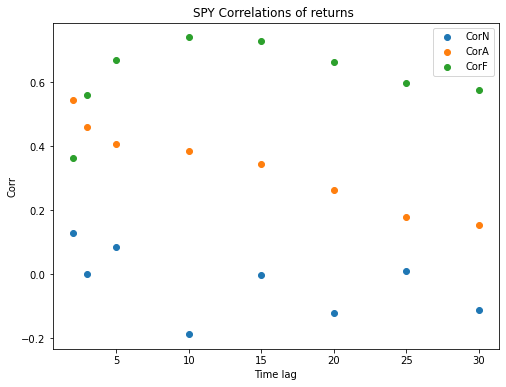

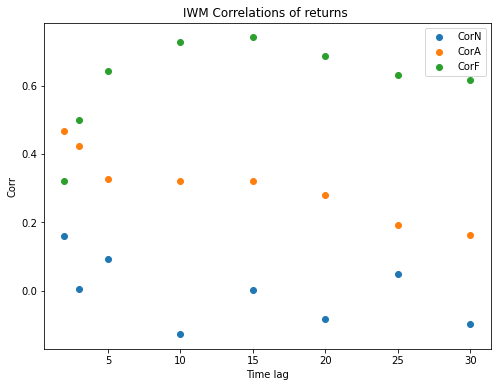

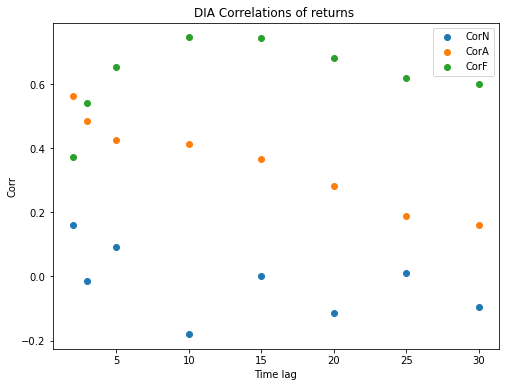

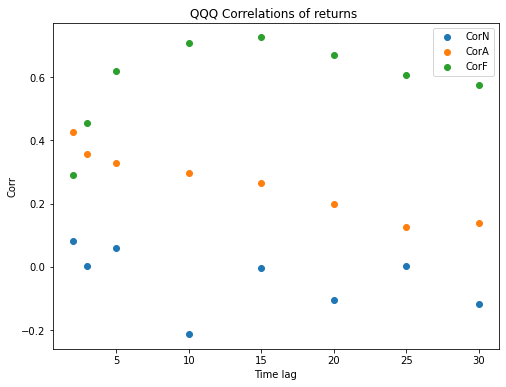

In [90]:
for ticker in equitylist:
    vol_clustering(ticker,dlist)


#### ii. Commodities list

2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13


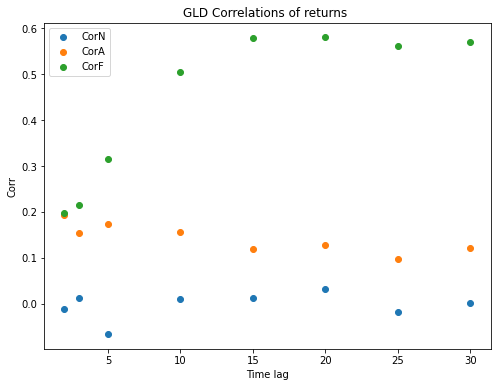

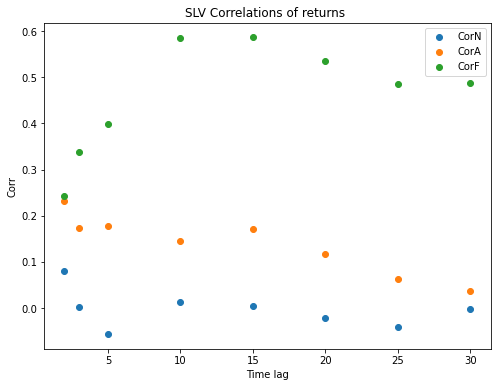

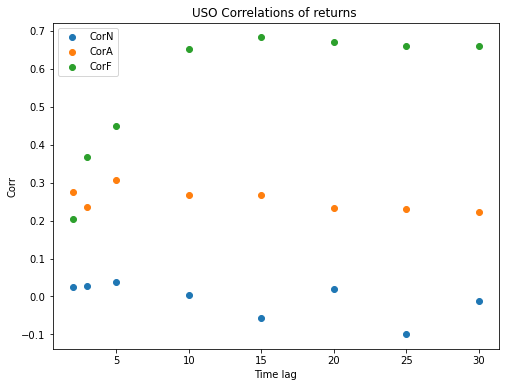

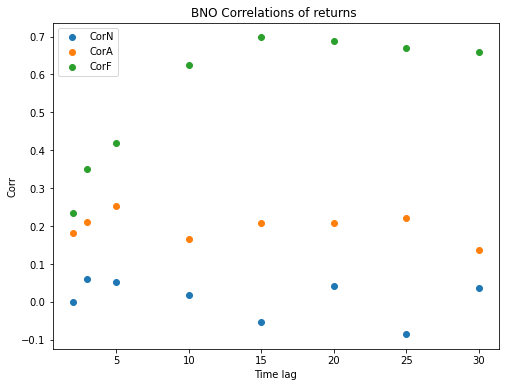

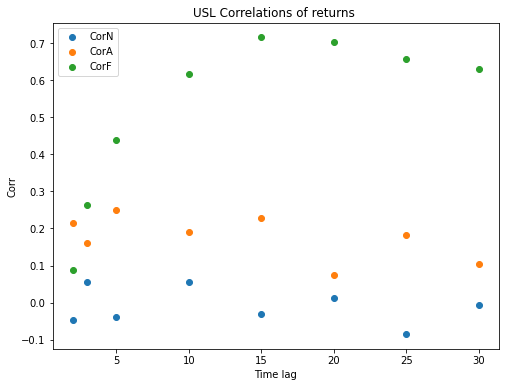

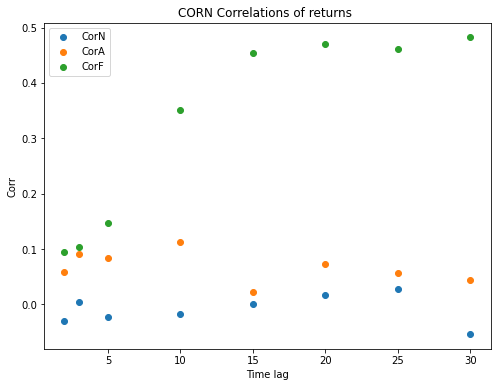

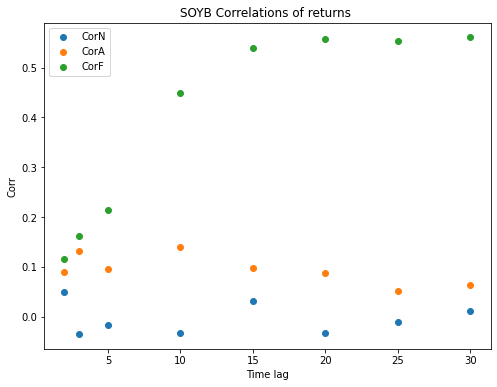

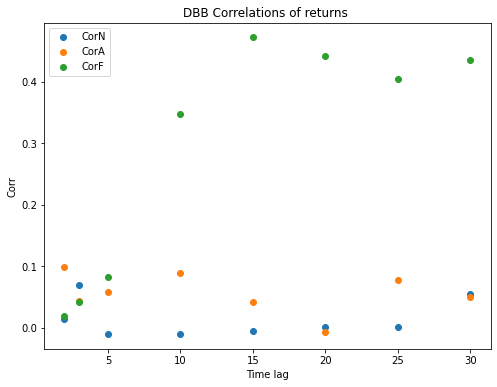

In [91]:
for ticker in commoditieslist:
    vol_clustering(ticker,dlist)


#### iii. Bond list

2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13
2015-08-15 2020-08-13


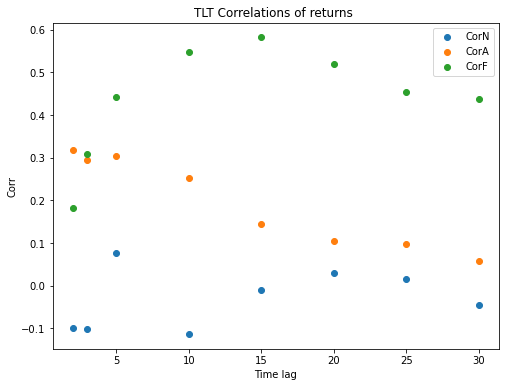

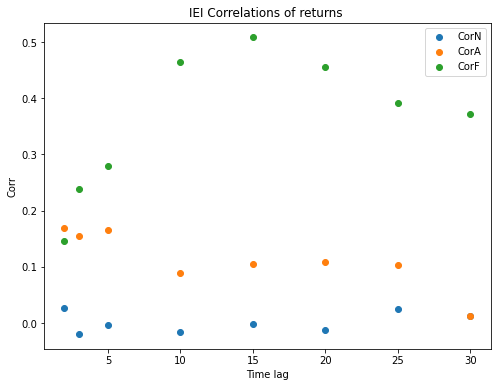

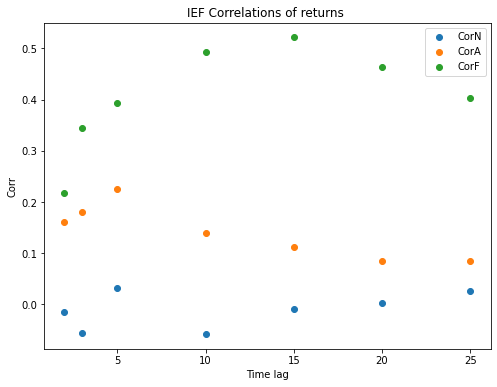

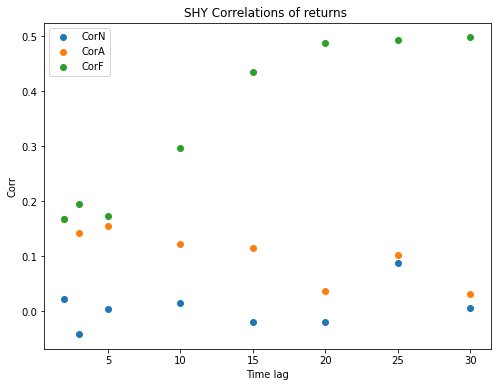

In [92]:
for ticker in bondlist:
    vol_clustering(ticker,dlist)